
## ZMUM 4 - Lasso

Metodę regularyzacji Lasso używamy do ograniczenia wariancji modelu poprzez eliminację zbędnych cech.

W metodzie LASSO (Least Absolute Shrinkage and Selection Operator) wykorzystujemy normę L1 do wygaszenia cech, które nia mają znaczącego wpływu na model. W przypadku tej metody funkcja kosztu $J_{lasso}(\omega)$ ma następującą postać:

$$J_{lasso}(\omega)=\sum_{i=1}^{m}\left(\hat{f}(x_i)−y_i\right)^2+\lambda \sum_{j=1}^n{|\omega_j|},$$

W przypadku regularyzacji metodą Lasso dokonuje się normalizacji zmiennych opisujących. 

**Celem tego laboratorium jest zapoznanie się z działaniem metod Lasso**.

Materiały pomocnicze, lekkie (wideo) wprowadzenia do :

* [Metody lasso](https://www.youtube.com/watch?v=NGf0voTMlcs)
* [Połączenie regresji Ridge i Lasso - Elastic Net](https://www.youtube.com/watch?v=1dKRdX9bfIo)

Na początek - wczytanie bibliotek oraz wygenerowanie zbioru danych:

In [2]:
# Wczytaj bilbioteki podstawowe
import math
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
# Wczytaj biblioteki potrzebne do zajęć
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

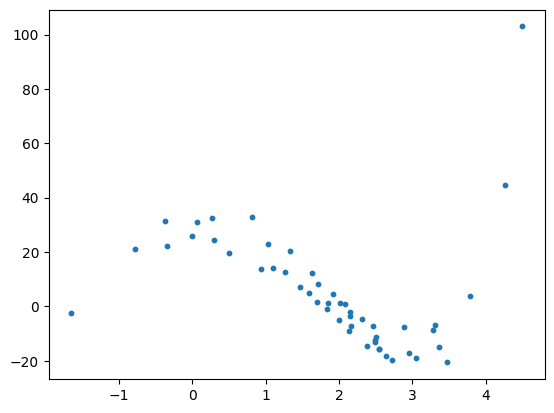

In [4]:
np.random.seed(5)
x = 2 - 3 * np.random.normal(0, 0.5, 50)
y = 30 + x - 8 * (x ** 2) - 0.5 * (x ** 3) + 0.15 * (x ** 5) + np.random.normal(-3, 5, 50)
plt.scatter(x, y, s=10)
plt.show()

W przypadku, gdy uzyskany model estymatora miałby być zastosowany do estymacji wartości wyjściowej dla nieznanych wartości wejściowych (a zwykle tak to właśnie wygląda), oryginalny zbiór danych powinien zostać podzielony na zbiór uczący i testowy.

In [5]:
# Ze zbioru danych wydzielamy zbiór testowy zawierający 20% danych.
x_test, x_train, y_test, y_train = train_test_split(x, y, test_size=0.2)

### Zadanie 1:

Do oceny modelu w procesie uczenia stosuje się często walidację krzyżową. W omawianym przypadku wyróżnia się dwa parametry metody - stopień wielomianu funkcji regresji oraz parametr $\lambda$. Zwykle pierwszy z nich jest ustalany a-priori, zaś drugi podlega weryfikacji poprzez wykonanie walidacji krzyżowej estymatorów dla różnych jego wartości. 

Korzystając z walidacji krzyżowej (5-krotny wybór zbioru) na zbiorze treningowym napisz funkcję, która dla wielomianu stopnia 15 narysuje wykres średniego błędu uczenia i średniego błędu walidacji, jak również wykres przedstawiający wartości współczynników modelu w funkcji zmiany parametru regularyzacji $\lambda=[0, 0.01, 0.02, 0.04, 0.08, \cdots, 10]$. Można przyjąć, że $\lambda_{a+1}=24\lambda_a$. Można skorzystać z funkcji [cross_validation](https://scikit-learn.org/stable/modules/cross_validation.html) lub [Search_Grid_CV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

In [6]:
from sklearn.model_selection import cross_validate
# Miejsce na potrzebne funkcje
from sklearn import linear_model  # using scikit-learn
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline

alphas = [0.01 / 24., 0.01, 0.02, 0.04, 0.08, 0.16, 0.32, 0.64, 1.28, 2.56, 5.12, 10.24]

val_err = []
train_err = []
for alfa in alphas:
    model = make_pipeline(PolynomialFeatures(degree=15), StandardScaler(),
                          Lasso(alpha=alfa, max_iter=100000, tol=0.001))
    results = cross_validate(model, x_train.reshape(-1, 1), y_train, cv=5, scoring='neg_mean_squared_error',
                             return_train_score=True)

    mean_training_score = -results['train_score'].mean()
    mean_validation_score = -results['test_score'].mean()

    train_err.append(mean_training_score)
    val_err.append(mean_validation_score)
    print(f'alpha={alfa}, train_err={mean_training_score}, val_err={mean_validation_score}')


/home/maciek/Templates/saris-2024/venv/lib64/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.733e+01, tolerance: 1.285e+00
  model = cd_fast.enet_coordinate_descent(
/home/maciek/Templates/saris-2024/venv/lib64/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.230e+01, tolerance: 2.166e+00
  model = cd_fast.enet_coordinate_descent(
/home/maciek/Templates/saris-2024/venv/lib64/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the

alpha=0.0004166666666666667, train_err=5.483985252897918, val_err=208082.33690801795
alpha=0.01, train_err=14.016455516103369, val_err=1049579.4888527808
alpha=0.02, train_err=15.949195763846003, val_err=267.98724800824095
alpha=0.04, train_err=16.36790678028622, val_err=72.43724961226567
alpha=0.08, train_err=17.096899779826668, val_err=89.82989473967466
alpha=0.16, train_err=18.176076197240892, val_err=119.78699176016801
alpha=0.32, train_err=19.56391171545518, val_err=234.68786183015672
alpha=0.64, train_err=23.454153095579564, val_err=269.8432951569907
alpha=1.28, train_err=31.7923047513731, val_err=258.4759866407857
alpha=2.56, train_err=54.46675497556481, val_err=217.28968039840478
alpha=5.12, train_err=75.03681176728375, val_err=195.31560986251387
alpha=10.24, train_err=156.34133088613925, val_err=244.97965788088655


Text(0.5, 1.0, 'Validation error')

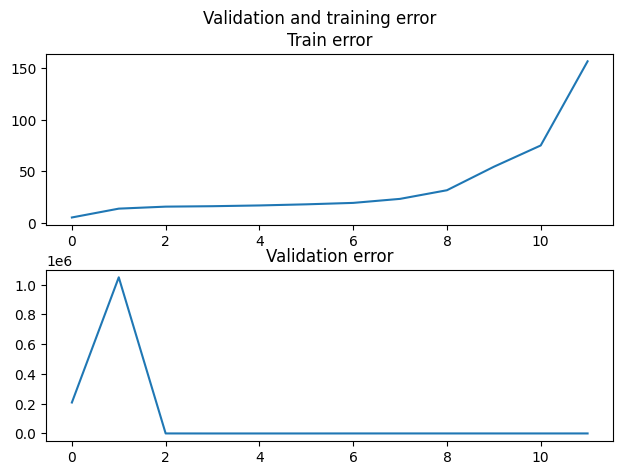

In [7]:
fig, axs = plt.subplots(2)
fig.suptitle('Validation and training error')
fig.tight_layout()

axs[0].plot(range(len(alphas)), train_err, label='train')
axs[0].set_title('Train error')
axs[1].plot(range(len(alphas)), val_err, label='validation')
axs[1].set_title('Validation error')

**Pytania:**
1. Jak zmieniają się wartości współczynników ze zmianą współczynnika regularyzacji $\lambda$?
2. Która wartość współczynnika regularyzacji $\lambda$ jest najlepsza dla wybranego modelu?

Wyucz opracowany model (stopnia 15) dla wybranego współczynnik $\lambda$ (uczenie na całym zbiorze treningowym). Wyznacz $\mbox{RMSE}=\sqrt{\frac{1}{m}\sum_{i=1}^{m}\left(\hat{f}(x_i)−y_i\right)^2}$ (pierwiastek błędu średniokwadratowego) dla zbioru uczącego i testowego i porównaj z wynikiem otrzymanym dla modelu stopnia 5.  

In [8]:
# Miejsce na potrzebne funkcje
alfpha = 0.04
max_iter = 100000
tol = 0.001

model_pl_15 = make_pipeline(PolynomialFeatures(degree=15), StandardScaler(),
                            Lasso(alpha=alfpha, max_iter=max_iter, tol=tol))
results_pl_15 = cross_validate(model_pl_15, x_train.reshape(-1, 1), y_train, cv=5, scoring='neg_mean_squared_error',
                               return_train_score=True)

model_pl_5 = make_pipeline(PolynomialFeatures(degree=5), StandardScaler(),
                           Lasso(alpha=alfpha, max_iter=max_iter, tol=tol))
results_pl_5 = cross_validate(model_pl_5, x_train.reshape(-1, 1), y_train, cv=5, scoring='neg_mean_squared_error',
                              return_train_score=True)

rmse_pl_15 = math.sqrt(-results_pl_15['test_score'].mean())
rmse_pl_5 = math.sqrt(-results_pl_5['test_score'].mean())

print(f'RMSE dla modelu 15 stopnia: {rmse_pl_15}')
print(f'RMSE dla modelu 5 stopnia: {rmse_pl_5}')

RMSE dla modelu 15 stopnia: 8.51100755564614
RMSE dla modelu 5 stopnia: 9.457100773228046


### Zadanie 2:
Dla wielomian stopnia = 10 proszę namalować wykres przedstawiający zmianę wartości parametrów modelu (wag) w funkcji lambda.

/home/maciek/Templates/saris-2024/venv/lib64/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.711e+01, tolerance: 2.452e+00
  model = cd_fast.enet_coordinate_descent(
/home/maciek/Templates/saris-2024/venv/lib64/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.834e+01, tolerance: 2.452e+00
  model = cd_fast.enet_coordinate_descent(
/home/maciek/Templates/saris-2024/venv/lib64/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the

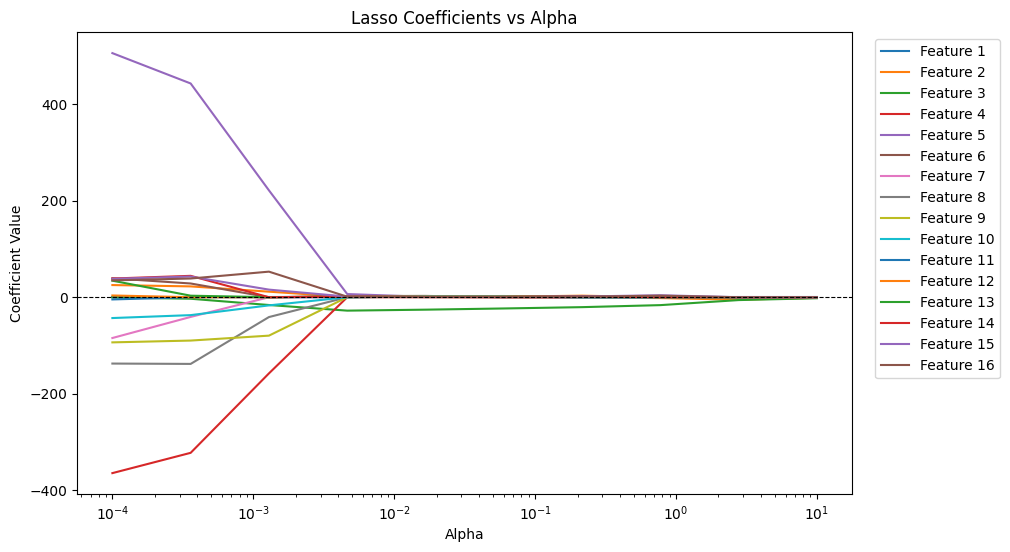

In [9]:
# Miejsce na rozwiązanie
alphas = np.logspace(-4, 1, 10)  # Alpha values from 0.0001 to 10
coefficients = []

for alpha in alphas:
    model = make_pipeline(
        PolynomialFeatures(degree=15),
        StandardScaler(),
        Lasso(alpha=alpha, max_iter=100000, tol=0.001)
    )
    model.fit(x_train.reshape(-1, 1), y_train)
    lasso_step = model.named_steps['lasso']
    coefficients.append(lasso_step.coef_)

coefficients = np.array(coefficients)
plt.figure(figsize=(10, 6))
for i in range(coefficients.shape[1]):
    plt.plot(alphas, coefficients[:, i], label=f'Feature {i + 1}')

plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Coefficient Value')
plt.title('Lasso Coefficients vs Alpha')
plt.axhline(0, color='black', linestyle='--', linewidth=0.8)
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()


## Metoda doboru cech modelu

In [10]:
# Wczytanie danych
import pandas as pd

dtype_dict = {'bathrooms': float, 'waterfront': int, 'sqft_above': int, 'sqft_living15': float, 'grade': int,
              'yr_renovated': int, 'price': float, 'bedrooms': float, 'zipcode': str, 'long': float,
              'sqft_lot15': float, 'sqft_living': float, 'floors': float, 'condition': int, 'lat': float, 'date': str,
              'sqft_basement': int, 'yr_built': int, 'id': str, 'sqft_lot': int, 'view': int}

sales = pd.read_csv('kc_house_data.csv', dtype=dtype_dict)

In [11]:
# Utworzenie nowych zmiennych
from math import log, sqrt

sales['sqft_living_sqrt'] = sales['sqft_living'].apply(sqrt)
sales['sqft_lot_sqrt'] = sales['sqft_lot'].apply(sqrt)
sales['bedrooms_square'] = sales['bedrooms'] * sales['bedrooms']
sales['floors_square'] = sales['floors'] * sales['floors']

In [12]:
# Ze zbioru danych wydzielamy zbiór testowy zawierający 20% danych.
train_data, test_data = train_test_split(sales, test_size=0.2)


### Zadanie 3 - Metoda Lasso dla regresji ceny nieruchomości

W metodzie LASSO (Least Absolute Shrinkage and Selection Operator) wykorzystujemy normę L1 do wygaszenia cech, które nia mają znaczącego wpływu na model. W przypadku tej metody funkcja kosztu $J_{lasso}(\omega)$ ma następującą postać:

$$J_{lasso}(\omega)=\sum_{i=1}^{m}\left(\hat{f}(x_i)−y_i\right)^2+\lambda \sum_{j=1}^n{|\omega_j|},$$

W przypadku regularyzacji metodą Lasso dokonuje się normalizacji zmiennych opisujących. 

Poniżej przykładowy kod.

In [13]:
from sklearn import linear_model  # using scikit-learn

all_features = ['bedrooms', 'bedrooms_square',
                'bathrooms',
                'sqft_living', 'sqft_living_sqrt',
                'sqft_lot', 'sqft_lot_sqrt',
                'floors', 'floors_square',
                'waterfront', 'view', 'condition', 'grade',
                'sqft_above',
                'sqft_basement',
                'yr_built', 'yr_renovated']

model_all = linear_model.Lasso(alpha=5e2)  # set parameters
model_all = make_pipeline(
    StandardScaler(),
    Lasso(alpha=5e2)
)
model_all.fit(sales[all_features], sales['price'])  # learn weights
lasso_step = model_all.named_steps['lasso']
lasso_step.coef_
# żadne nie zostało wyzerowane więc wybrane zostały wszystkie cechy

/home/maciek/Templates/saris-2024/venv/lib64/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.785e+13, tolerance: 2.913e+11
  model = cd_fast.enet_coordinate_descent(


array([ -17538.11222958,    3589.89724427,   38088.61471106,
        439508.17896234, -380147.95150794,   23267.57993292,
        -40834.08751751,  -17063.62984203,   27051.554779  ,
         48579.36854357,   31684.58157262,   17131.55747303,
        152645.71813899,   69716.3225851 ,   38627.15613743,
        -93773.18031087,    6564.52656232])

**Na podstawie wyników powyższego kodu określ, które cechy zostały wybrane przez algorytm.**

Tak samo jak działaliśmy w przypadku regularyzacji grzbietowej, wydziel 20% zbiór testowy, a następnie przy pomocy CV na zbiorze zbiorze uczącym i powyższego kodu, dokonaj doboru współczynnika alpha. Wykreś RMSE oraz współczynniki poszczególnych cech w funkcji zmiany parametru $\lambda$.

In [ ]:
# Miejsce na kod
x_train, x_test, y_train, y_test = train_test_split(sales[all_features], sales['price'], test_size=0.2)
alphas = [0.01 / 24., 0.01, 0.02, 0.04, 0.08, 0.16, 0.32, 0.64, 1.28, 2.56, 5.12, 10.24]

val_err = []
train_err = []
rmse = []
for alfa in alphas:
    model = make_pipeline(PolynomialFeatures(degree=15), StandardScaler(),
                          Lasso(alpha=alfa, max_iter=100000, tol=0.001))
    results = cross_validate(model, x_train, y_train, cv=5, scoring='neg_mean_squared_error', return_train_score=True)

    mean_training_score = -results['train_score'].mean()
    mean_validation_score = -results['test_score'].mean()
    lasso_step = model.named_steps['lasso']
    coefficients.append(lasso_step.coef_)

    train_err.append(mean_training_score)
    val_err.append(mean_validation_score)
    rmse.append(math.sqrt(-results['test_score'].mean()))


    print(f'alpha={alfa}, train_err={mean_training_score}, val_err={mean_validation_score}')


In [ ]:
coefficients = np.array(coefficients)
plt.figure(figsize=(10, 6))
for i in range(coefficients.shape[1]):
    plt.plot(alphas, coefficients[:, i], label=f'Feature {i + 1}')

plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Coefficient Value')
plt.title('Lasso Coefficients vs Alpha')
plt.axhline(0, color='black', linestyle='--', linewidth=0.8)
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()

**Pytania:**
1. Jaką wartość parametru $\lambda$ należy wybrać dla naszego modelu ?
2. Które z cech, dla ustalonej wartości parametru $\lambda$ wchodzą w skład modelu - podaj w kolejności od najbardziej znaczących cech ?

### Zadanie 4 - Metoda spadku względem współrzędnych (ang. coordinate descent)

Celem zadania jest napisanie metody spadku względem współrzędnych przetesowanie jej dla problemu regresji wielomianowej dla wielomianu stopnia 20:
1. Bez regularyzacji.
2. Z regularyzacją Lasso.
Podaną poniżej funkcję należy podzielić na zbiór treningowy i testowy i dokonać jej estymacji.

In [ ]:
np.random.seed(10)
x = 2 - 3 * np.random.normal(0, 0.5, 50)
y = 30 + x - 5 * (x ** 2) - 2 * (x ** 3) + 0.15 * (x ** 5) + np.random.normal(-3, 5, 50)
plt.scatter(x, y, s=10)
plt.show()

## Metoda spadku względem współrzędnych (z normalizacją cech)


### Normalizacja cech
Posiadając zbiór uczący i testowy dokonaj normalizację każdej cechy. Do tego celu należy posłużyć się wartościami normalizującymi wyznaczonymi na **zbiorze uczącym**. Wartość tę wyznaczamy ze wzoru:
$$ normalizator = \sqrt{\sum_{i=1}^Nh_j(x_i)^2} $$

Następnie wykorzysując ją dokonujemy normalizacji cech zbioru uczącego i testowego:

$$ \underline{h}_j(x_k) = \frac{h_j(x_k)}{normalizator}, $$

gdzie $\underline{h}_j(x_k)$ - jest wartością normalizowanej cechy.


### Zadanie 5 - Napisz funkcję normalizującą cechy


In [ ]:
def norm_feature(train_x, test_x):
    # Miejsce na kod

    return norm_train_x, norm_test_x

### Metoda spadku względem współrzędnych dla regresji bez regularyzacji

1. Dokonaj inicjacji wag: $ \hat{w} = 0 $ (lub mądrzej)

2. Do osiągnięcia zbieżności:

   Dla $ j=0,1,... , M $:
           
     wyznacz: $ \rho_j = \sum_{i=1}^N\underline{h}_j(x_i) (y_i - \hat{y}_i(\hat{w}_{-j})) $, gdzie $\underline{h}_j(x_i)$ jest znormalizowaną $j$-tą cechą, a $\hat{y}_i(\hat{w}_{-j})$ jest predykcją wartości dla modelu bez $j$-tej cechy 
    
     ustaw $ \hat{w}_j = \rho_j $

### Zadanie 6 - wyznaczenie współczynników regresji metodą spadku koordynatów

Napisz metodę spadku koordynatów bez regularyzacji, wyznacz wartości współrzędnych tą metodą dla wielomianu 5 stopnia i porównaj otrzymane wartości z wynikami otrzymanymi z pseudoowrtoności. (Wykorzystaj wcześniejsze kody lub pakiety scikit-learn).

In [ ]:
# Miejsce na kod

### Metoda spadku względem współrzędnych dla LASSO

1. Dokonaj inicjacji wag: $ \hat{w} = 0 $ (lub mądrzej)

2. Do osiągnięcia zbieżności:

   Dla $ j=0,1,... , M $:
           
     wyznacz: 
     $ \rho_j = \sum_{i=1}^N\underline{h}_j(x_i) \left(y_i - \hat{y}_i(\hat{w}_{-j})\right) $, gdzie 
     
   * $\underline{h}_j(x_i)$ jest znormalizowaną $j$-tą cechą, 
   
   * $\hat{y}_i(\hat{w}_{-j})$ jest predykcją wartości dla modelu bez $j$-tej cechy. 
    
     Następnie ustaw:
     
     $\hat{w}_j = \begin{cases}
     \rho_j + \frac{\lambda}{2} \mbox{, jeśli } \rho_j < -\frac{\lambda}{2}, \\
     0 \mbox{, jeśli } \rho_j \in \left< -\frac{\lambda}{2},\frac{\lambda}{2}\right>, \\
     \rho_j - \frac{\lambda}{2} \mbox{, jeśli } \rho_j > \frac{\lambda}{2}
     \end{cases}$

### Zadanie 7 - wyznaczenie współczynników metody Lasso metodą spadku koordynatów

Napisz metodę spadku koordynatów z regularyzacją lasso dla znormalizowanych cech, wyznacz wartości współrzędnych tą metodą dla wielomianu 5 stopnia i porównaj otrzymane wartości z wynikami otrzymanymi z pseudoowrtoności. (Wykorzystaj wcześniejsze kody lub pakiety scikit-learn)

In [ ]:
# Miejsce na kod